In [2]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [3]:
import pandas as pd
df_raw = pd.read_csv("credit_risk_dataset.csv")

In [4]:
import sqlite3
# Create a SQLite connection
conn = sqlite3.connect(':memory:')  # Uses an in-memory database
df_raw.to_sql('credit_risk', conn, index=False, if_exists='replace')  # Load data into SQL

32581

In [5]:
df_raw.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
query = """
SELECT
    AVG(loan_amnt) AS "Average Loan",
    AVG(loan_int_rate) AS "Average Interest Rate",
    loan_grade AS "Category"
FROM credit_risk
GROUP BY loan_grade;
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

   Average Loan  Average Interest Rate Category
0   8539.273453               7.327651        A
1   9995.483686              10.995555        B
2   9213.862651              13.463542        C
3  10849.241589              15.361448        D
4  12915.845436              17.009455        E
5  14717.323651              18.609159        F
6  17195.703125              20.251525        G


In [7]:
query = """
SELECT *
FROM credit_risk
WHERE loan_status = 1
ORDER BY cb_person_cred_hist_length DESC
LIMIT 10;
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

   person_age  person_income person_home_ownership  person_emp_length  \
0          55          50000                  RENT                2.0   
1          51          37200                  RENT                4.0   
2          53          34000              MORTGAGE                0.0   
3          55          34000                  RENT                0.0   
4          52         163000              MORTGAGE                9.0   
5          62          76500                  RENT                0.0   
6          54          33600                  RENT                0.0   
7          66          40000                  RENT                2.0   
8          52          36000                  RENT                8.0   
9          55          78000              MORTGAGE                2.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    HOMEIMPROVEMENT          A      20000           7.51            1   
1            MEDICAL          B       3000      

In [8]:
query = """
SELECT *
FROM (
SELECT *, ROW_NUMBER() OVER (PARTITION BY loan_intent ORDER BY loan_amnt DESC) AS rank
FROM credit_risk)
ranked
WHERE rank<=5;
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

    person_age  person_income person_home_ownership  person_emp_length  \
0           23         113000                  RENT                8.0   
1           24          74000                   OWN                8.0   
2           24          95000              MORTGAGE                3.0   
3           25          96000              MORTGAGE                5.0   
4           23         112800              MORTGAGE                3.0   
5           26          77100                  RENT                8.0   
6           26         108160                  RENT                4.0   
7           23         115000                  RENT                2.0   
8           23         120000                  RENT                0.0   
9           26         213000              MORTGAGE                6.0   
10          24          72400              MORTGAGE                4.0   
11          24          96000              MORTGAGE                8.0   
12          25         100505         

In [9]:
query = """
SELECT *
FROM credit_risk
WHERE loan_amnt> (
   SELECT AVG(loan_amnt)
   FROM credit_risk
   WHERE loan_status = 1);
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              23          65500                  RENT                4.0   
2              24          54400                  RENT                8.0   
3              26          77100                  RENT                8.0   
4              24          78956                  RENT                5.0   
...           ...            ...                   ...                ...   
10633          60          45600                  RENT                1.0   
10634          52          65004                  RENT                4.0   
10635          54         120000              MORTGAGE                4.0   
10636          65          76000                  RENT                3.0   
10637          56         150000              MORTGAGE                5.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [10]:
query = """
SELECT
    COUNT(loan_percent_income) AS "Total Count",
    MIN(loan_percent_income) AS "Minimum Rate",
    MAX(loan_percent_income) AS "Maximum Rate",
    AVG(loan_percent_income) AS "Average Rate",
    sqrt(AVG(loan_percent_income * loan_percent_income) - AVG(loan_percent_income) * AVG(loan_percent_income)) AS Standard_Deviation
FROM credit_risk;
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

   Total Count  Minimum Rate  Maximum Rate  Average Rate  Standard_Deviation
0        32581           0.0          0.83      0.170203             0.10678


In [11]:
query = """
SELECT
    *,
    CASE
        WHEN loan_percent_income > 0.5 THEN 'High'
        WHEN loan_percent_income BETWEEN 0.15 AND 0.5 THEN 'Medium'
        ELSE 'Low'
    END AS "Borrower Risk"

FROM credit_risk;
"""

# Run SQL query
result = pd.read_sql_query(query, conn)
print(result)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [12]:
df_raw.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import missingno as msno

<Axes: >

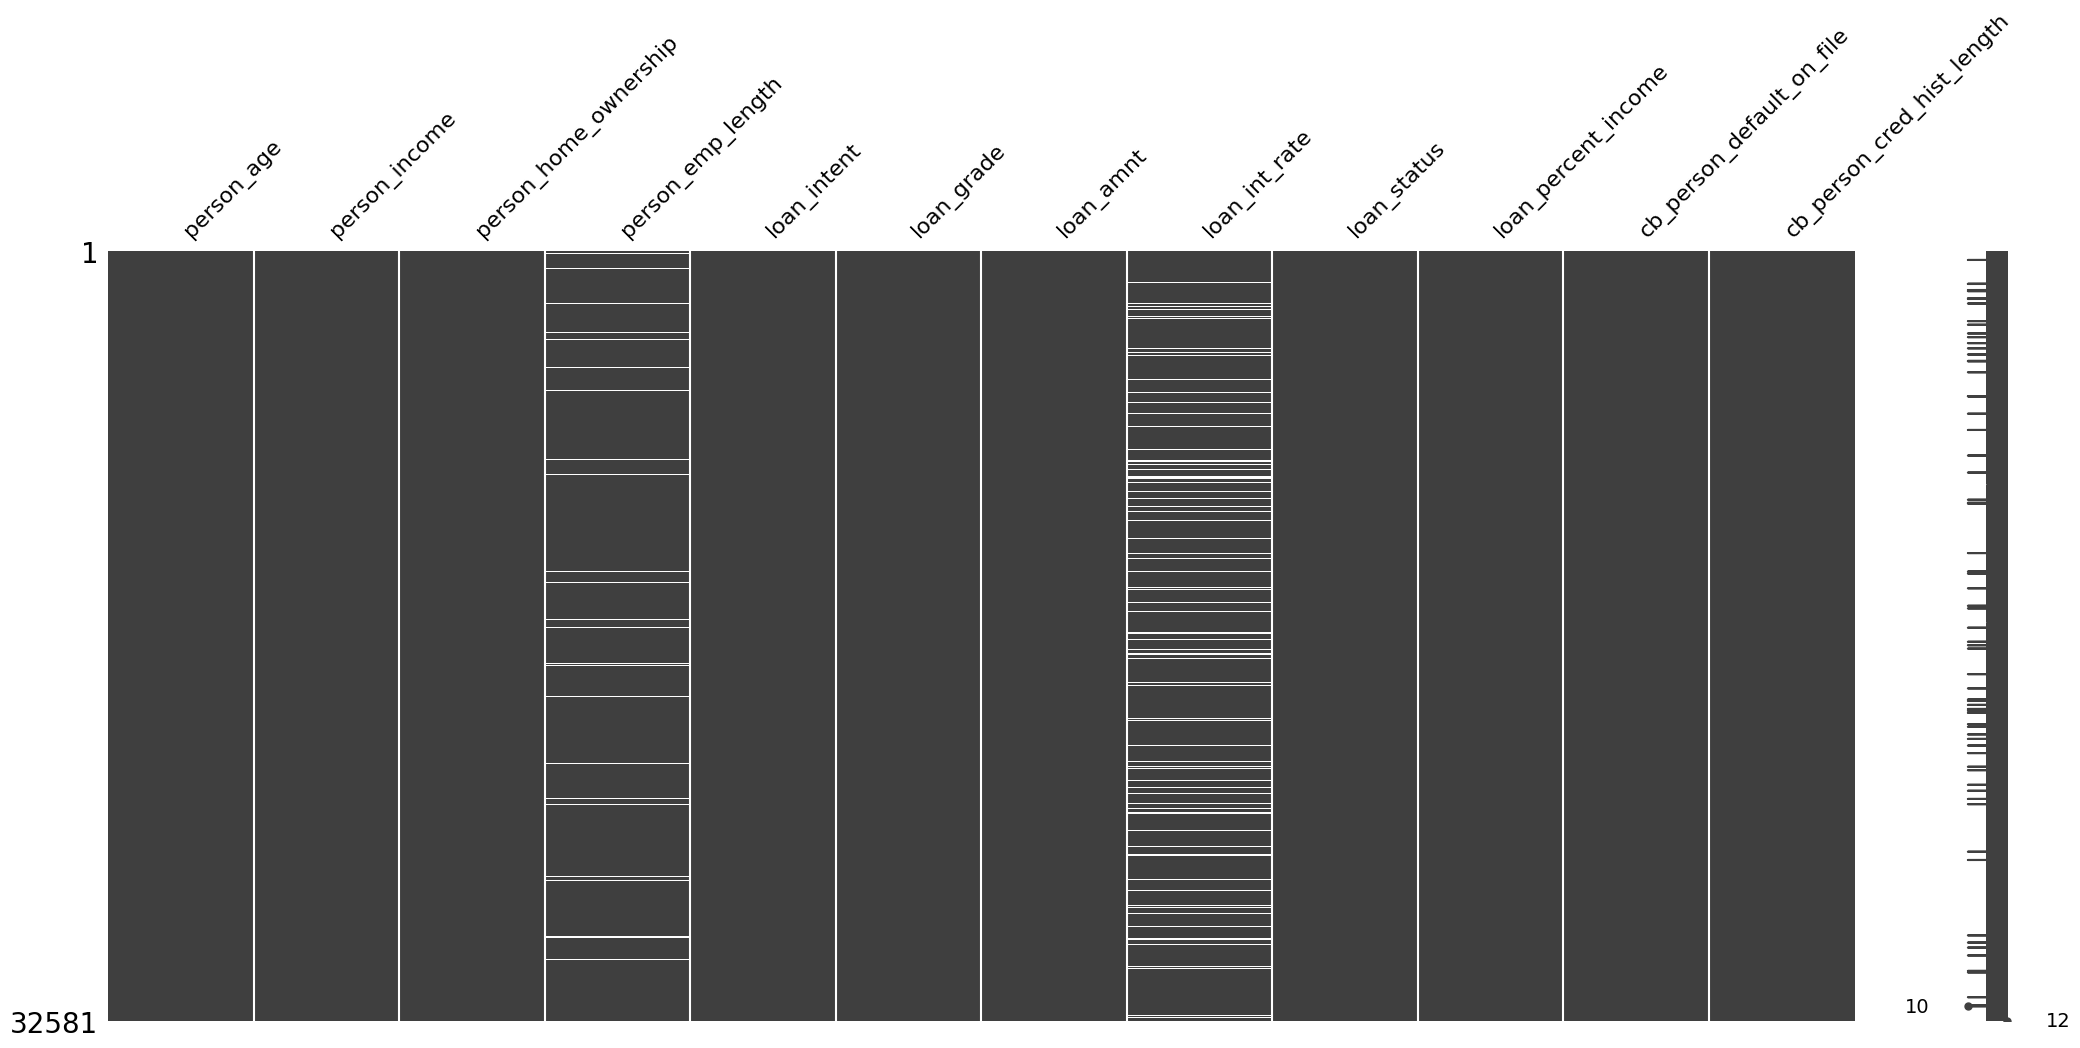

In [14]:
msno.matrix(df_raw)

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
df_raw.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
df = df_raw.dropna(subset=['person_emp_length']).copy()

df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df.groupby('loan_grade')['loan_int_rate'].transform('median')
)

<Axes: >

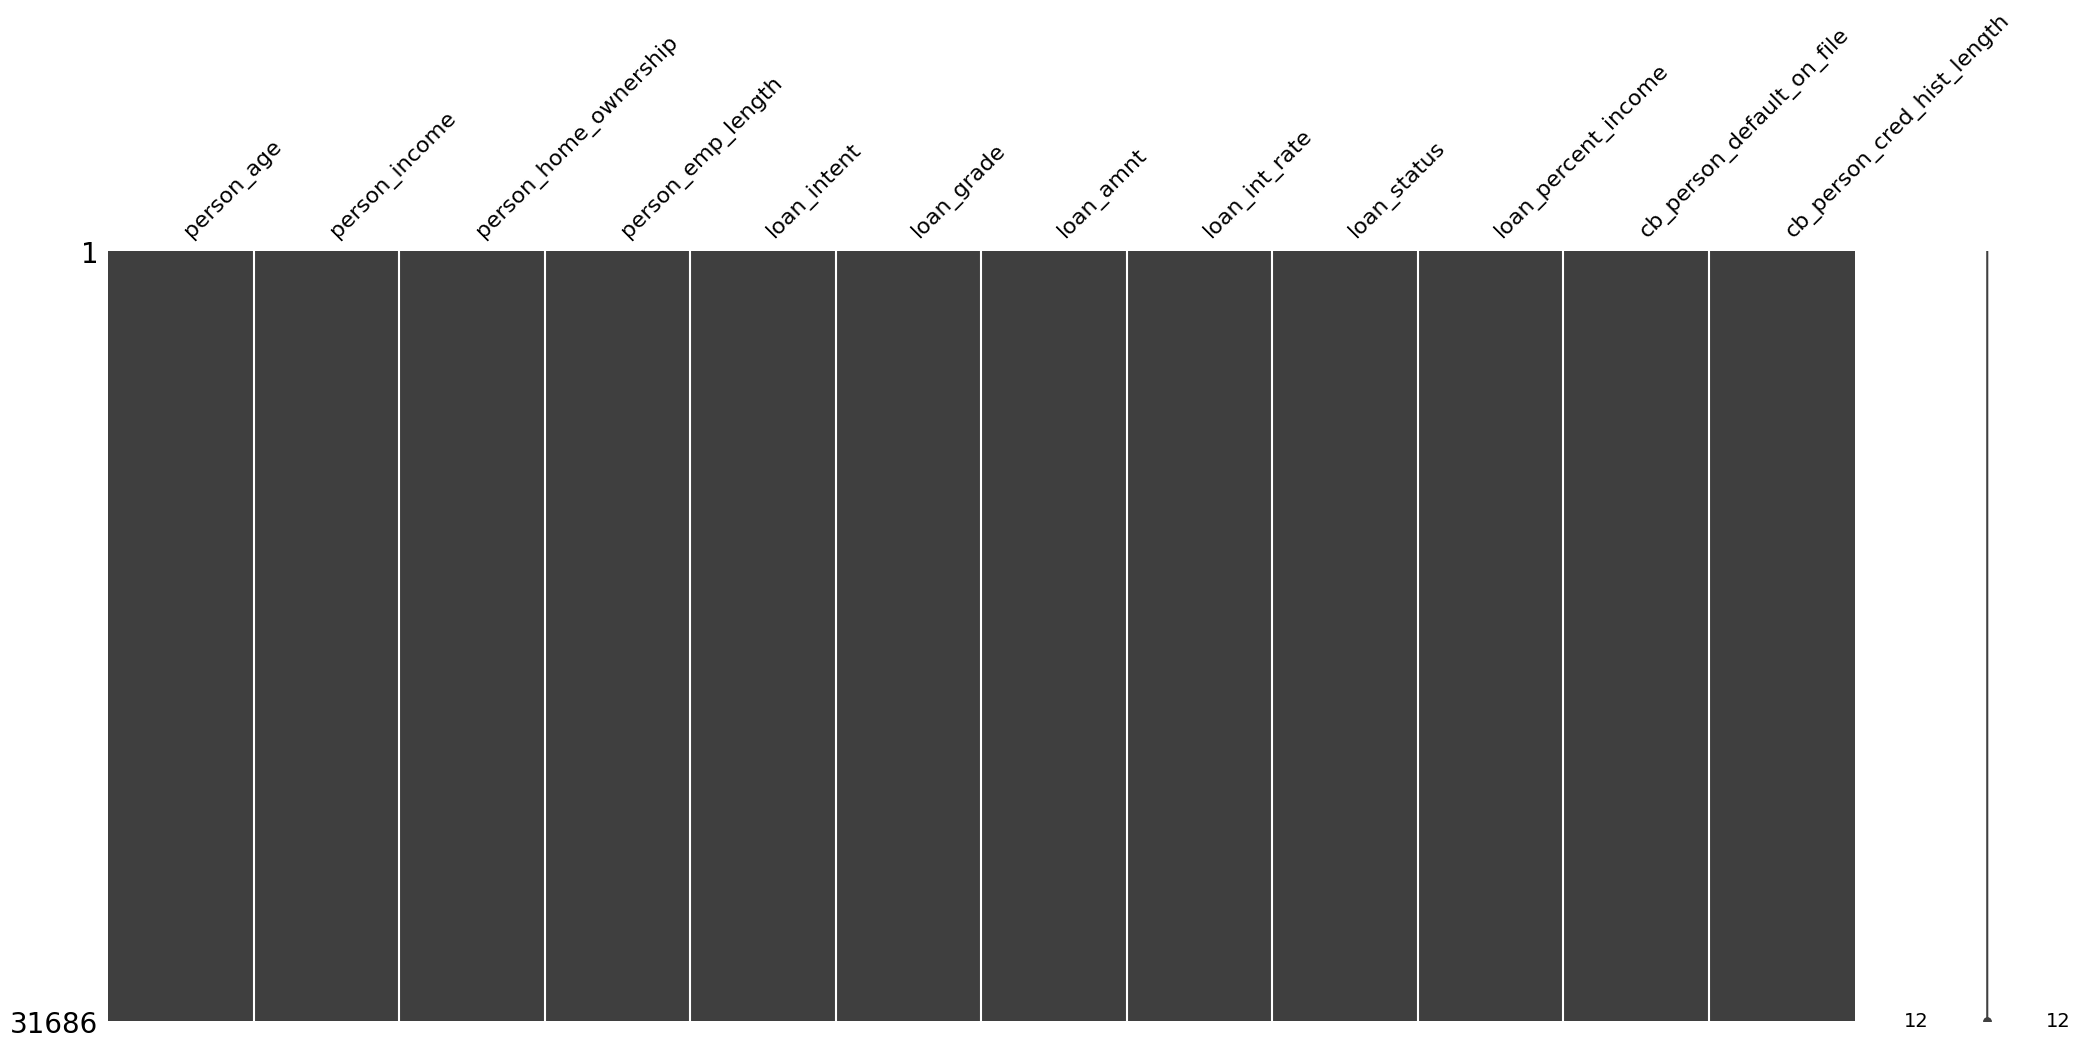

In [18]:
msno.matrix(df)

In [19]:
df.shape

(31686, 12)

In [20]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [21]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [22]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [23]:
df['loan_status'].unique()

array([1, 0])

In [24]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
# Columns you want to encode
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Create dummies
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)


print("Shape of the DataFrame after dummies:", df_dummies.shape)

print(df.index.equals(df_dummies.index))

# Drop original categorical columns and add dummies
df = pd.concat([df.drop(columns=categorical_cols), df_dummies], axis=1)

print("Shape of the DataFrame after concatenation:", df.shape)

Shape of the DataFrame after dummies: (31686, 15)
True
Shape of the DataFrame after concatenation: (31686, 23)


In [26]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [27]:
from sklearn.preprocessing import StandardScaler
# Columns you want to scale
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Standardize selected numerical columns
scaler = StandardScaler()
df_scaled_part = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df.index)

print("Shape of the DataFrame after scaling:", df_scaled_part.shape)
print(df.index.equals(df_scaled_part.index))

# Drop original numerical columns and add scaled ones
df = pd.concat([df.drop(columns=numerical_cols), df_scaled_part], axis=1)

print("Shape of the DataFrame after concatenation:", df.shape)

Shape of the DataFrame after scaling: (31686, 7)
True
Shape of the DataFrame after concatenation: (31686, 23)


In [28]:
df.describe()

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04
mean,0.215426,-1.148134e-16,2.870336e-17,1.435168e-17,1.148134e-16,-3.224643e-16,-1.004618e-16,-5.740672e-17
std,0.411124,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,0.000000,-1.218094e+00,-1.004254e+00,-1.156213e+00,-1.445889e+00,-1.755824e+00,-1.595672e+00,-9.380698e-01
25%,0.000000,-7.464096e-01,-4.372336e-01,-6.734201e-01,-7.356763e-01,-9.812599e-01,-7.489728e-01,-6.918131e-01
50%,0.000000,-2.747251e-01,-1.712720e-01,-1.906274e-01,-2.622009e-01,-1.617863e-02,-1.845065e-01,-4.455564e-01
75%,0.000000,3.541877e-01,2.131813e-01,5.335617e-01,4.480122e-01,7.615082e-01,5.681153e-01,5.394706e-01
max,1.000000,1.827820e+01,9.504500e+01,2.853554e+01,3.999078e+00,3.803544e+00,6.212778e+00,5.957119e+00


<Axes: >

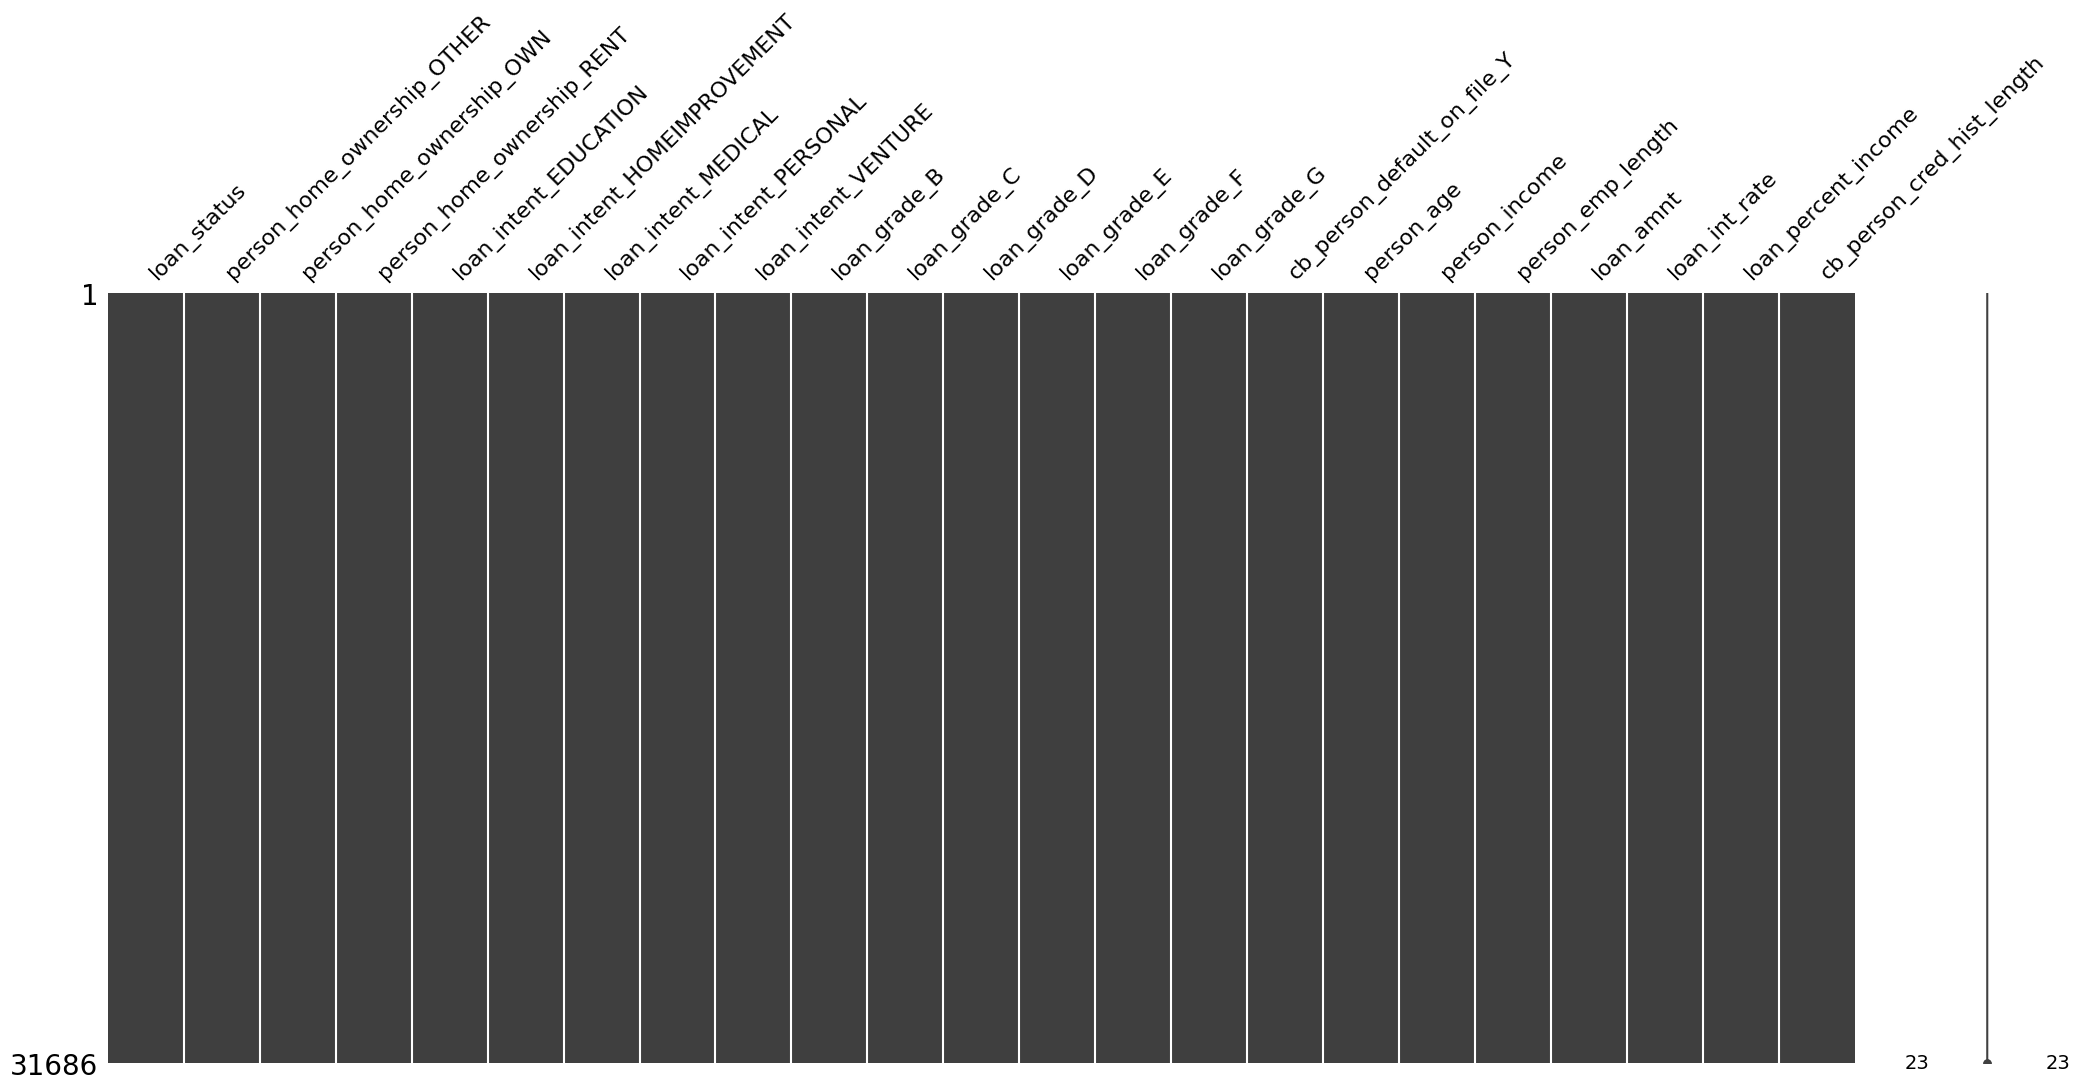

In [29]:
msno.matrix(df)

In [30]:
df.replace({True: 1, False: 0}, inplace=True)

<ipython-input-30-3673826116>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace=True)


In [31]:
df.describe()

,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,...,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,...,31686.000000,31686.000000,31686.000000,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04,3.168600e+04
mean,0.215426,0.003377,0.076059,0.507353,0.198510,0.110774,0.186107,0.169444,0.175346,0.321467,...,0.007448,0.002020,0.177649,-1.148134e-16,2.870336e-17,1.435168e-17,1.148134e-16,-3.224643e-16,-1.004618e-16,-5.740672e-17
std,0.411124,0.058014,0.265096,0.499954,0.398885,0.313858,0.389199,0.375149,0.380268,0.467047,...,0.085982,0.044898,0.382223,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.218094e+00,-1.004254e+00,-1.156213e+00,-1.445889e+00,-1.755824e+00,-1.595672e+00,-9.380698e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.464096e-01,-4.372336e-01,-6.734201e-01,-7.356763e-01,-9.812599e-01,-7.489728e-01,-6.918131e-01
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.747251e-01,-1.712720e-01,-1.906274e-01,-2.622009e-01,-1.617863e-02,-1.845065e-01,-4.455564e-01
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,3.541877e-01,2.131813e-01,5.335617e-01,4.480122e-01,7.615082e-01,5.681153e-01,5.394706e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.827820e+01,9.504500e+01,2.853554e+01,3.999078e+00,3.803544e+00,6.212778e+00,5.957119e+00


<Axes: >

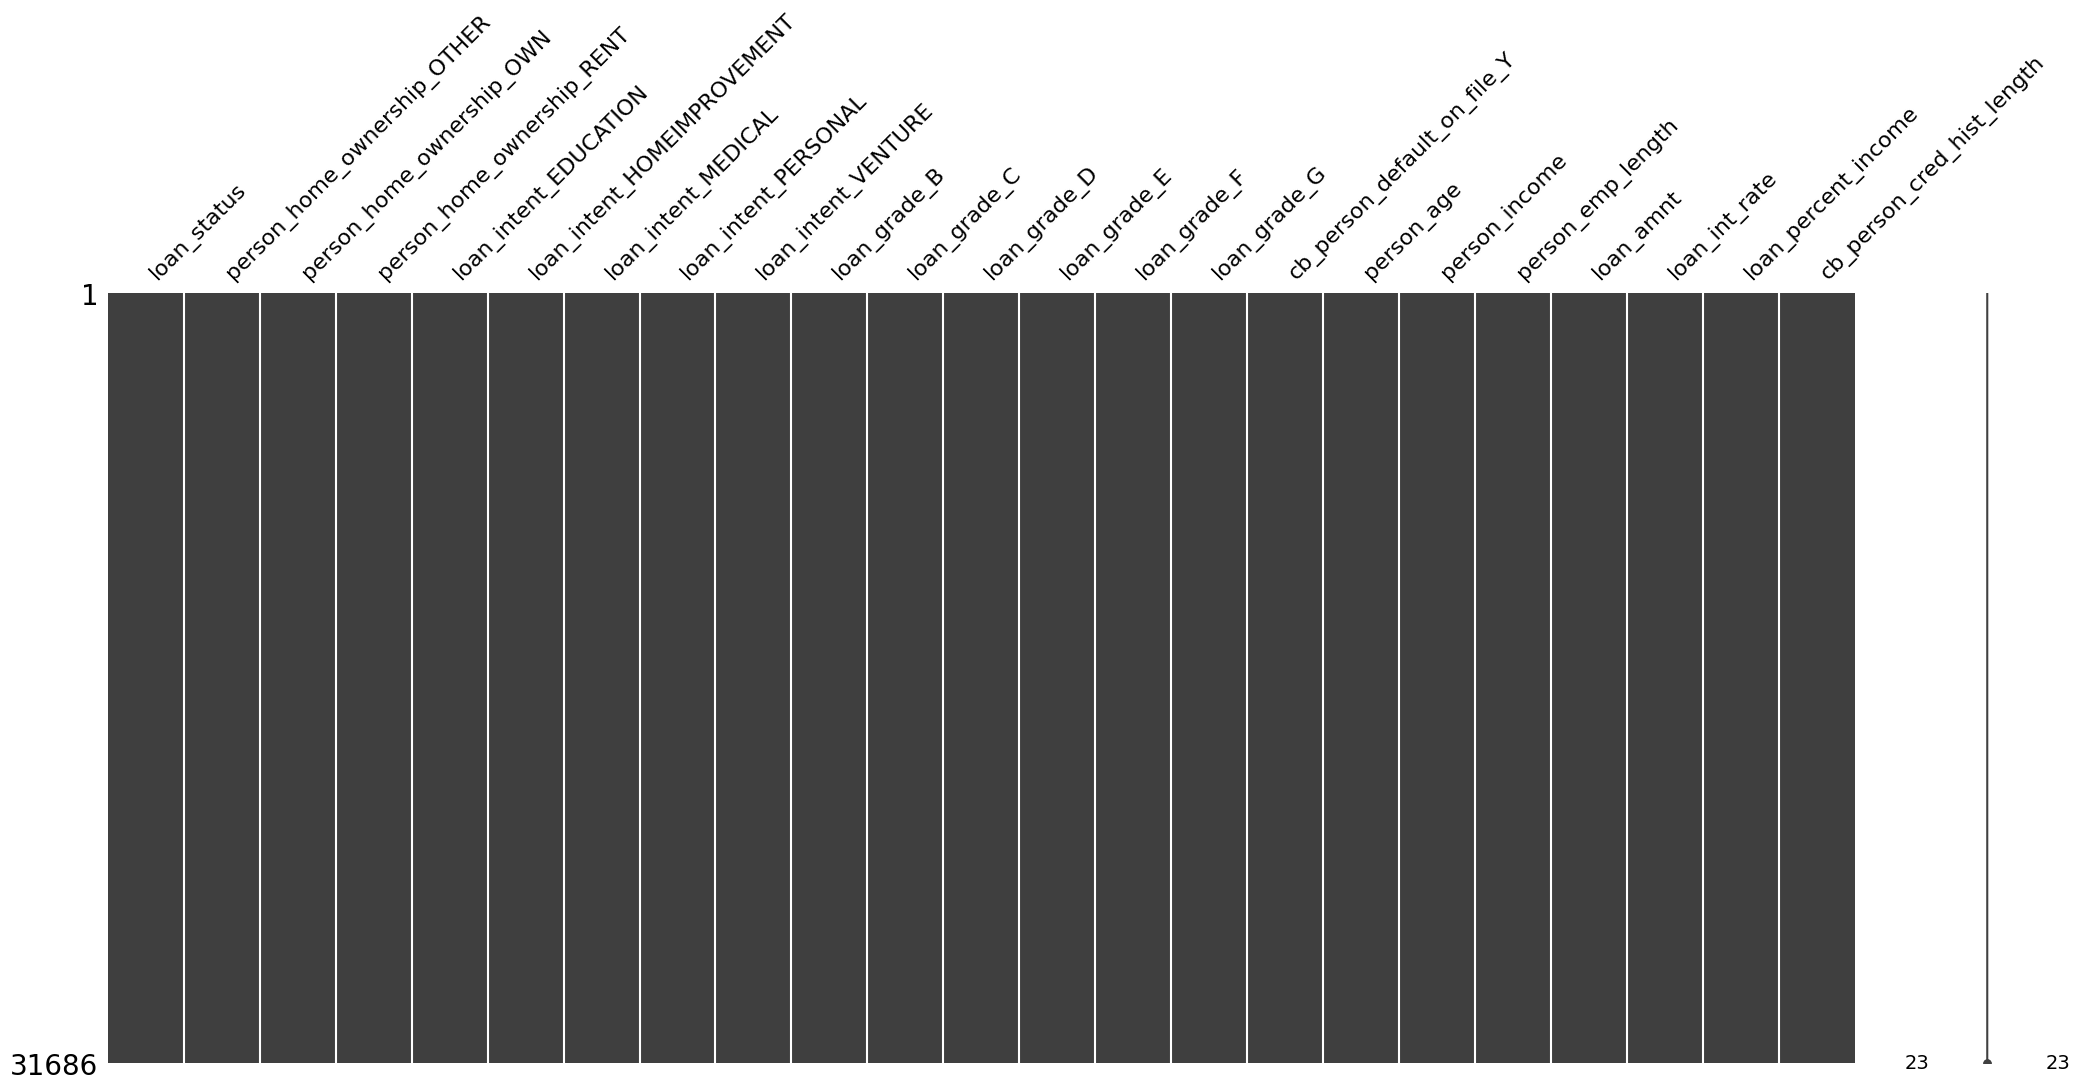

In [32]:
msno.matrix(df)

In [33]:
df.shape

(31686, 23)

In [34]:
df['loan_status'].value_counts()

,count
loan_status,
0,24860
1,6826


In [35]:
from sklearn.model_selection import train_test_split

# Input and Output Variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']  # Target variable (1 = default, 0 = no default)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [36]:
from sklearn.utils import resample

df_train = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
default_0 = df_train[df_train['loan_status'] == 0]
default_1 = df_train[df_train['loan_status'] == 1]

# Upsample minority class
default_1_upsampled = resample(
    default_1,
    replace=True,                 # Sample with replacement
    n_samples=len(default_0),       # Match number of majority class
    random_state=25               # For reproducibility
)

# Combine majority and upsampled minority
df_train_oversampled = pd.concat([default_0, default_1_upsampled])

# Shuffle the dataset
df_train_oversampled = df_train_oversampled.sample(frac=1, random_state=25).reset_index(drop=True)

# Check the class distribution
print(df_train_oversampled['loan_status'].value_counts())

loan_status
0    17434
1    17434
Name: count, dtype: int64


In [37]:
df_train_oversampled.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,0,0,0,0,0,0,1,0,0,0,...,0,0,-0.746410,1.046164,0.050769,0.842575,-1.265475,-0.560817,-0.938070,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0.196959,0.293276,-0.673420,0.053449,-0.987506,-0.466740,1.031984,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,-0.431953,-0.211848,0.050769,2.420826,1.454868,2.167437,-0.445556,1
3,0,0,1,0,0,0,0,1,0,1,...,0,1,0.983100,-0.427574,-0.673420,0.558490,0.761508,1.508892,0.046957,1
4,0,0,1,1,0,0,0,0,0,1,...,0,0,-0.903638,-0.587763,-0.673420,0.526925,0.645948,2.449670,-0.691813,1


In [38]:
X_train = df_train_oversampled.drop(columns=['loan_status'])
y_train = df_train_oversampled['loan_status']  # Target variable (1 = default, 0 = no default)

In [39]:
X_train.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,-0.746410,1.046164,0.050769,0.842575,-1.265475,-0.560817,-0.938070
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0.196959,0.293276,-0.673420,0.053449,-0.987506,-0.466740,1.031984
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,-0.431953,-0.211848,0.050769,2.420826,1.454868,2.167437,-0.445556
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0.983100,-0.427574,-0.673420,0.558490,0.761508,1.508892,0.046957
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,-0.903638,-0.587763,-0.673420,0.526925,0.645948,2.449670,-0.691813


Model Training Using LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Train the PD model
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Predict
y_pred = model_log.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


Model Training using XGBoost

In [41]:
import xgboost as xgb

# Train XGBoost model
model_xg = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False)
model_xg.fit(X_train, y_train)

# Predict
y_pred = model_xg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.89


Model Training using Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Buat model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Latih model
model_rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = model_rf.predict(X_test)

# Evaluasi akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.91


#Misal pakai data baru buat di test

In [58]:
# --- Misalnya data_baru masih mentah seperti awal ---
data_baru = pd.DataFrame({
    'person_age': [30],
    'person_income': [50000],
    'person_home_ownership': ['RENT'],
    'person_emp_length': [5],
    'loan_intent': ['EDUCATION'],
    'loan_grade': ['B'],
    'loan_amnt': [10000],
    'loan_int_rate': [10.5],
    'loan_status': [None],  # boleh dikosongkan
    'loan_percent_income': [0.2],
    'cb_person_default_on_file': ['N'],
    'cb_person_cred_hist_length': [3]
})


In [59]:
loan_grade_medians = df_raw.groupby('loan_grade')['loan_int_rate'].median()

# Kolom-kolom seperti saat training
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Simpan kolom dummy hasil training agar urutannya konsisten
dummy_cols_training = pd.get_dummies(df_raw[categorical_cols], drop_first=True).columns

# Simpan scaler dari training
scaler = StandardScaler()
scaler.fit(df[numerical_cols])  # df = data training final

def preprocess_data_baru(data_baru):
    # Drop baris jika person_emp_length kosong
    data_baru = data_baru.dropna(subset=['person_emp_length'])

    # Isi missing loan_int_rate dengan median sesuai loan_grade
    data_baru['loan_int_rate'] = data_baru.apply(
        lambda row: loan_grade_medians.get(row['loan_grade'], df['loan_int_rate'].median())
        if pd.isna(row['loan_int_rate']) else row['loan_int_rate'],
        axis=1
    )

    # Buat dummy untuk data_baru
    dummies = pd.get_dummies(data_baru[categorical_cols], drop_first=True)

    # Pastikan semua kolom dummy seperti training (kalau ada yg hilang, tambahkan dengan 0)
    for col in dummy_cols_training:
        if col not in dummies:
            dummies[col] = 0
    dummies = dummies[dummy_cols_training]  # Urutkan

    # Gabungkan non-categorical
    data_baru = pd.concat([data_baru.drop(columns=categorical_cols), dummies], axis=1)

    # Scaling kolom numerik
    scaled_part = pd.DataFrame(scaler.transform(data_baru[numerical_cols]), columns=numerical_cols, index=data_baru.index)

    # Gabungkan dengan kolom lain
    data_baru = pd.concat([data_baru.drop(columns=numerical_cols), scaled_part], axis=1)

    # Ubah boolean jika ada
    data_baru.replace({True: 1, False: 0}, inplace=True)

    return data_baru

In [60]:
# Preprocessing
data_baru_bersih = preprocess_data_baru(data_baru)

# Hapus kolom target jika masih ada
if 'loan_status' in data_baru_bersih.columns:
    data_baru_bersih = data_baru_bersih.drop(columns=['loan_status'])

# Prediksi
prediksi = model_log.predict(data_baru_bersih)
print(f"Hasil prediksi: {'DEFAULT' if prediksi[0] == 1 else 'AMAN'}")



Hasil prediksi: AMAN


In [61]:
# Preprocessing
data_baru_bersih = preprocess_data_baru(data_baru)

# Hapus kolom target jika masih ada
if 'loan_status' in data_baru_bersih.columns:
    data_baru_bersih = data_baru_bersih.drop(columns=['loan_status'])

# Prediksi
prediksi = model_xg.predict(data_baru_bersih)
print(f"Hasil prediksi: {'DEFAULT' if prediksi[0] == 1 else 'AMAN'}")

Hasil prediksi: DEFAULT


In [62]:
# Preprocessing
data_baru_bersih = preprocess_data_baru(data_baru)

# Hapus kolom target jika masih ada
if 'loan_status' in data_baru_bersih.columns:
    data_baru_bersih = data_baru_bersih.drop(columns=['loan_status'])

# Prediksi
prediksi = model_rf.predict(data_baru_bersih)
print(f"Hasil prediksi: {'DEFAULT' if prediksi[0] == 1 else 'AMAN'}")

Hasil prediksi: DEFAULT


In [63]:
# Probabilitas dari Logistic Regression
proba_log = model_log.predict_proba(data_baru_bersih)[0][1]  # Probabilitas default

# Probabilitas dari XGBoost
proba_xg = model_xg.predict_proba(data_baru_bersih)[0][1]

# Probabilitas dari Random Forest
proba_rf = model_rf.predict_proba(data_baru_bersih)[0][1]

# Tampilkan hasil
print(f"Logistic Regression - Probabilitas DEFAULT: {proba_log:.2f}")
print(f"XGBoost             - Probabilitas DEFAULT: {proba_xg:.2f}")
print(f"Random Forest       - Probabilitas DEFAULT: {proba_rf:.2f}")


Logistic Regression - Probabilitas DEFAULT: 0.00
XGBoost             - Probabilitas DEFAULT: 0.77
Random Forest       - Probabilitas DEFAULT: 0.65
